<a href="https://colab.research.google.com/github/jbpost2/ST-554-Big-Data-With-Python-Course-Notes/blob/main/01_Programming_in_python/18_Plotting_matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plotting with `matplotlib`

Justin Post

---

Remember that our first steps with a data set are generally to try and get to know our data through an exploratory data analysis (EDA).

- EDA generally consists of a few steps:
    + Understand how your data is stored
    + Do basic data validation
    + Determine rate of missing values
    + Clean data up data as needed
    + Investigate distributions
        - Univariate measures/graphs
        - Multivariate measures/graphs
    + Apply transformations and repeat previous step

Our overall goal is to describe the distributions of our variables. We have two types of variables:
- categorical - data values represent labels
- numerical - data values are numeric where we can do math on the values

How we summarize the distribution depends on which types of variable(s) we are working with. We've discussed how to find numerical summaries already:
- frequencies for categorical variables (via contingency tables)
- measures of center and spread for numeric variables

These types of measures are great for telling us about certain aspects of a distribution, such as a quick measure of center or spread, and are very useful for comparing two distributions. However, we often want to understand the shape of the distribution a variable might take on. This is best investigated via graphical summaries!

- Common Graphical summaries
  + Bar plots (categorical data)   
  + Histograms  
  + Box plots  
  + Scatter plots





---

## Plotting Systems in `python`

- `matplotlib`: [based on matlab](https://matplotlib.org/) plotting.  Similar to base R plotting

- `seaborn`: an abstraction of `matplotlib` but [still growing](https://seaborn.pydata.org/nextgen/)

- `Bokeh`: for [interactive visuals via HTML](https://bokeh.org/)

- `plotly`: general plotting system that has a [python module](https://plotly.com/python/)

- `plotnine`: [a ggplot port](https://plotnine.readthedocs.io/en/stable/)

---

## Plotting with `matplotlib`

- Two APIs (or ways to interact with matplotlib)
  + Explicit axes interface (object oriented api)
  + **Implicit pyplot interface** (what we'll cover)

- When using the implicit API we use functions like
  + `plt.figure()`, `plt.plot(...)`, `plt.scatter()`, `plt.bar()`, or `plt.hist()`
- We then determine *axes* and *artist* elements    
- We add labels, legends, and annotations
- Finally we produce the plot (and would then usually close the plot to denote that we are done working on it - not usually needed when programming in `jupyter` notebooks)
  + `plt.show()` then `plt.close()`


### Reading in Data to Plot

- Consider data on titanic passengers in `titanic.csv`
- This is a really common dataset to play around with
- Let's start with a focus on plotting categorical data

We start by importing `matplotlib.pyplot` as `plt`. This is a common refernece. The `pyplot` module has the functions we'll use to do our plotting such as `pyplot.hist()` or `pyplot.plot()`.

In [1]:
import matplotlib.pyplot as plt

Now we'll read in the titanic dataset using `pandas`. This dataset is available at:
https://www4.stat.ncsu.edu/~online/datasets/titanic.csv

In [2]:
import pandas as pd
#readin data
titanic_data = pd.read_csv("https://www4.stat.ncsu.edu/~online/datasets/titanic.csv")

Some of the variables in the data have a lot of missing values. Let's drop those. We also saw that converting some variables to `category` type variables was useful for having better labeling. Let's do that as well.

In [4]:
#remove some columns and a bad row
sub_titanic_data = titanic_data.drop(columns = ["body", "cabin", "boat"], axis = 1) \
                               .iloc[:(titanic_data.shape[0]-1)]

#create category versions of the variables
#embarked variable
sub_titanic_data["embarkedC"] = sub_titanic_data.embarked.astype("category")
sub_titanic_data.embarkedC = sub_titanic_data.embarkedC.cat.rename_categories(
                                    ["Cherbourg", "Queenstown", "Southampton"])
#sex variable
sub_titanic_data["sexC"] = sub_titanic_data.sex.astype("category")
sub_titanic_data.sexC = sub_titanic_data.sexC.cat.rename_categories(["Female", "Male"])
#survived variable
sub_titanic_data["survivedC"] = sub_titanic_data.survived.astype("category")
sub_titanic_data.survivedC = sub_titanic_data.survivedC.cat.rename_categories(["Died", "Survived"])

---

### Barplots

Categorical variable - entries are a label or attribute   

Our goal is to describe the distribution of these variables. We do this by **creating summary counts** or **frequncy counts**

- Barplots give a visual of those counts!
  + Use `plt.bar()`
    - `x` represents the categories
    - `height` the corresponding heights

We have three categorical variables we'll investigate. Let's start with the `embarkedC` variable.

We know the `x` values (the category labels). We just need the `height`s to plot. We can find the heights by creating a one-way contingency table!

In [13]:
table = sub_titanic_data.embarkedC.value_counts()
table

Southampton    914
Cherbourg      270
Queenstown     123
Name: embarkedC, dtype: int64

Now we'll use `plt.bar()` and map the categories (via calling the `.categories` attribute from our column of data) to `x` and the contingency table counts to `height`.

The `x` and `height` values just need to be paired up.

In [14]:
#get the categories
print(sub_titanic_data.embarkedC.cat.categories)
#note that the ordering does not line up with the counts
print(table)

Index(['Cherbourg', 'Queenstown', 'Southampton'], dtype='object')
Southampton    914
Cherbourg      270
Queenstown     123
Name: embarkedC, dtype: int64


As the ordering isn't the same, we'll have to be careful to make sure things are paired up appropriately!

In [19]:
index = [1, 2, 0]
table[index]

Cherbourg      270
Queenstown     123
Southampton    914
Name: embarkedC, dtype: int64

<BarContainer object of 3 artists>

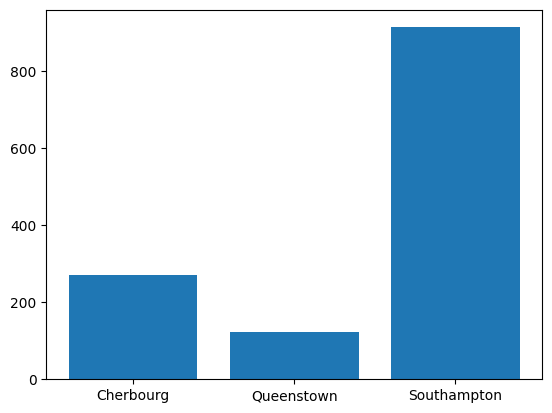

In [21]:
plt.bar(x = sub_titanic_data.embarkedC.cat.categories,  height = table[index])
#plt.show() would be needed if we weren't in a notebook

Nice! A good looking barplot. This is our first step. Next we want to make it look a bit nicer by adding labels, legends, and annotations.

In this case, we can add a better `xlabel`, `ylabel`, and `title`.

Text(0.5, 1.0, 'Most Embarked in the Southampton Port')

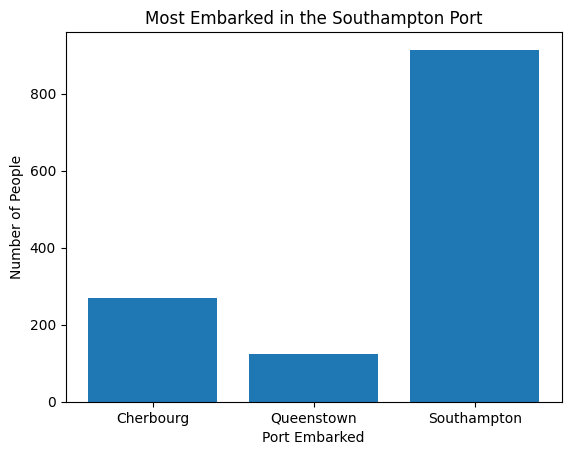

In [22]:
plt.bar(x = sub_titanic_data.embarkedC.cat.categories,  height =  table[index])
#as these are all being run in the same cell, these get added to the plot created
plt.xlabel("Port Embarked")
plt.ylabel("Number of People")
plt.title("Most Embarked in the Southampton Port")

- A common way to resize the plot is to first call `plt.subplots()` and specify the `figsize` argument. We give this a `tuple` of the width and height we want.

Text(0.5, 1.0, 'Most Embarked in the Southampton Port')

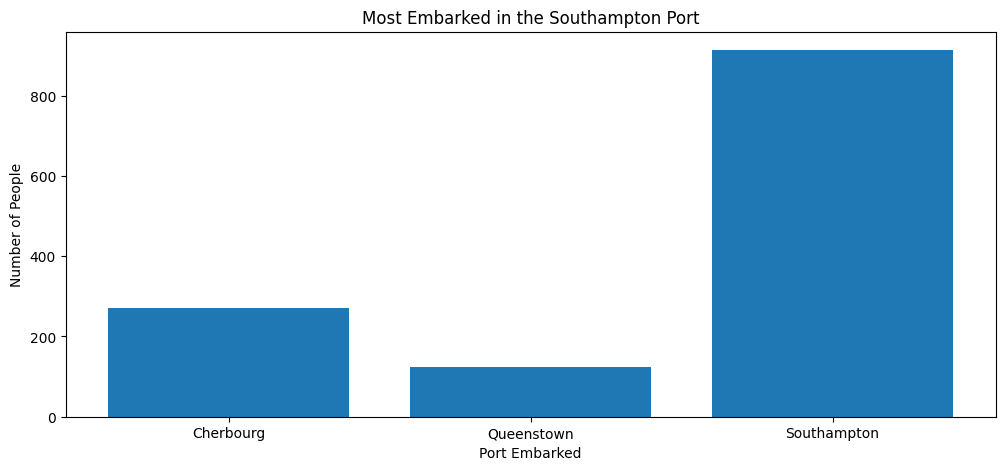

In [25]:
plt.subplots(figsize = (12, 5))
plt.bar(x = sub_titanic_data.embarkedC.cat.categories,  height =  table[index])
plt.xlabel("Port Embarked")
plt.ylabel("Number of People")
plt.title("Most Embarked in the Southampton Port")

---

#### Stacked Barplot with `matplotlib`

If we want to include a second categorical variable in our plot we can do so in a few ways. The first is to color the bars by the values of the other variable. In this way we can see how that variable distributes across the categories of our current variable!

- The first step is to create the table of counts for our two variables
- We'll do this via the `pd.crosstab()` function

In [26]:
stack_table = pd.crosstab(sub_titanic_data.embarkedC, sub_titanic_data.survivedC)
stack_table

survivedC,Died,Survived
embarkedC,,
Cherbourg,120,150
Queenstown,79,44
Southampton,610,304


To manually build this bar plot with `plt.bar()` we can do the following:
- Put our embarked variable labels on the x-axis
- Create bars with heights corresponding to the counts for Died.
- Create a second set of bars that sit directly on top of those bars with heights corresponding to the Survived counts
- These bars should be different colors to denote the Died vs Survived counts!

Remember that as we work on a plot within a cell, we continue to add to it unless we use `plt.show()`. This means we can use two calls to `plt.bar()` within the same cell and it will keep drawing on the same plot.

In [27]:
#we want to get the heights for the Died bars
stack_table.loc[:, "Died"]

embarkedC
Cherbourg      120
Queenstown      79
Southampton    610
Name: Died, dtype: int64

In [28]:
#notice that these now line up with our category order so we don't need to change that
sub_titanic_data.embarkedC.cat.categories

Index(['Cherbourg', 'Queenstown', 'Southampton'], dtype='object')

Our first step is to plot these on a bar plot. We'll add a `label` argument to `plt.bar()` which will make it easy to add a legend at the end.

<BarContainer object of 3 artists>

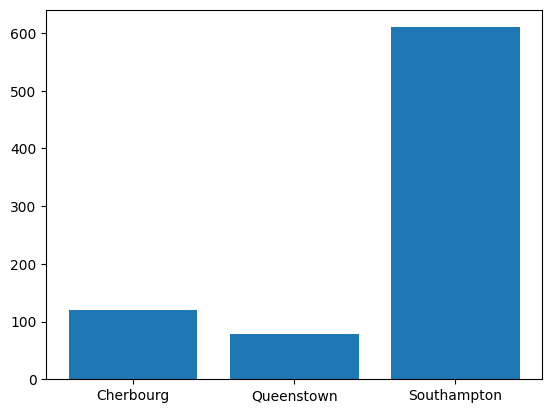

In [29]:
plt.bar(
  x = sub_titanic_data.embarkedC.cat.categories,
  height = stack_table.loc[:, "Died"],
  label = "Died")

Now we want to find the Survived counts and put those on top of these bars.

In [30]:
stack_table.loc[:, "Survived"]

embarkedC
Cherbourg      150
Queenstown      44
Southampton    304
Name: Survived, dtype: int64

We can add a `bottom = ` argument to our second `plt.bar()` call to specify where the bottom of the bars should start (the counts of the Died!)

<BarContainer object of 3 artists>

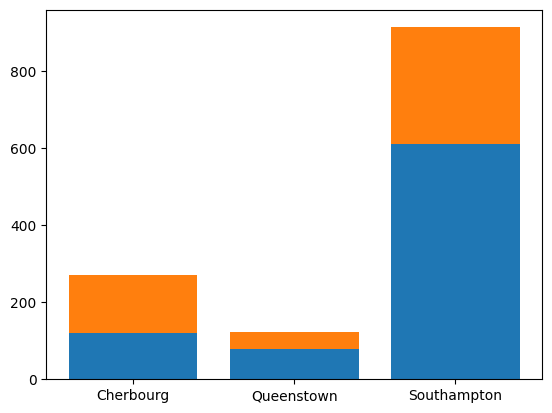

In [32]:
plt.bar(
  x = sub_titanic_data.embarkedC.cat.categories,
  height = stack_table.loc[:, "Died"],
  label = "Died")
plt.bar(
  x = sub_titanic_data.embarkedC.cat.categories,
  height = stack_table.loc[:, "Survived"],
  bottom = stack_table.loc[:, "Died"],
  label = "Survived"
)

Nice! Colors are automatically created for us. Now we just need to add some nice labels to help us understand the plot.

We'll use `plt.legend()` to produce a legend based off the `label`s used.

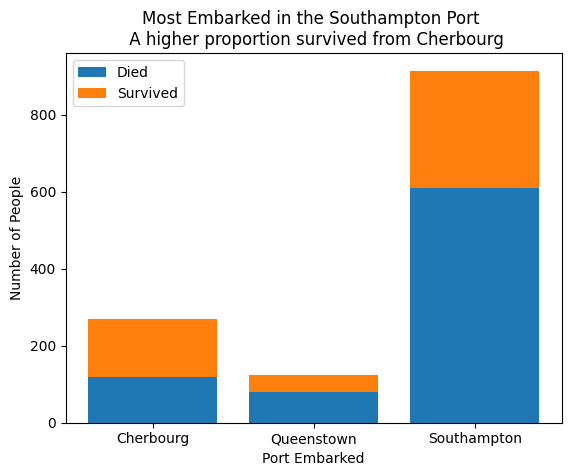

In [44]:
plt.bar(
  x = sub_titanic_data.embarkedC.cat.categories,
  height = stack_table.loc[:, "Died"],
  label = "Died")
plt.bar(
  x = sub_titanic_data.embarkedC.cat.categories,
  height = stack_table.loc[:, "Survived"],
  bottom = stack_table.loc[:, "Died"],
  label = "Survived"
  )
plt.xlabel("Port Embarked")
plt.ylabel("Number of People")
plt.title("Most Embarked in the Southampton Port \n A higher proportion survived from Cherbourg")
plt.legend(loc = 0)

---

#### Side-by-Side Barplot with `matplotlib`

Alternative to the **stacked** bar plot is the **side-by-side** bar plot. This is the same idea but we put the bars for the categories next to each other instead of on top of eachother.

This is similar to our first bar plot but we need to have different x locations for each bar!

Let's take this bar plot of just the Died with port of embarkment.

We can change the x values from the categories to numbers.

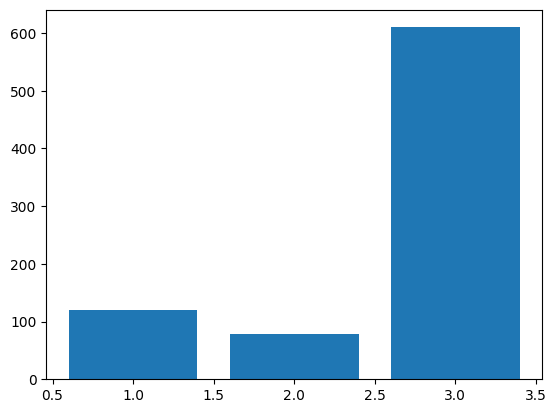

In [38]:
plt.bar(
  x = [1, 2, 3],
  height = stack_table.loc[:, "Died"],
  label = "Died")

Now we can specify the widths of the bars via the `width` argument. By default they are almost 1 here. Let's make them smaller.

<BarContainer object of 3 artists>

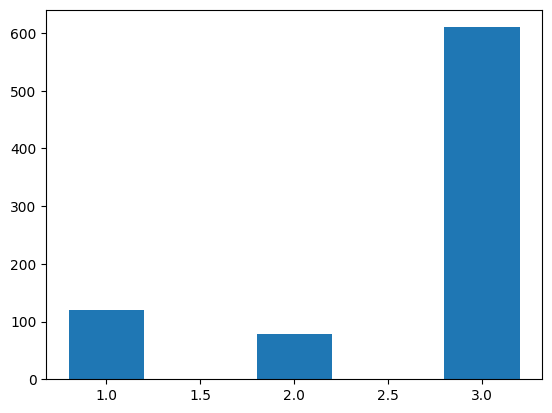

In [47]:
plt.bar(
  x = [1, 2, 3],
  height = stack_table.loc[:, "Died"],
  width = 0.4,
  label = "Died")

Ok, now let's just fix the x-axis labels! This can be done by using `plt.xticks()`. Here we specify the x values where we want our axis values to go along with corresponding labels.

([<matplotlib.axis.XTick at 0x7f565d37ab90>,
 [Text(1, 0, 'Cherbourg'),
  Text(2, 0, 'Queenstown'),
  Text(3, 0, 'Southampton')])

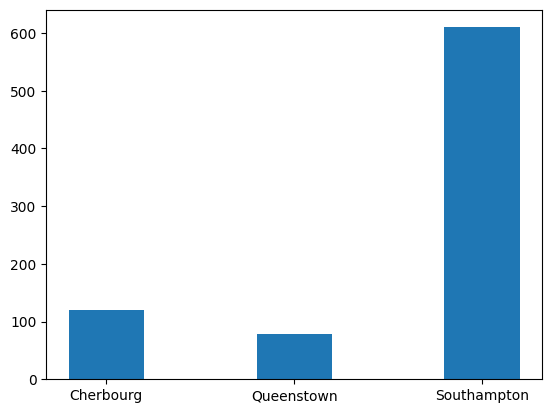

In [48]:
plt.bar(
  x = [1, 2, 3],
  height = stack_table.loc[:, "Died"],
  width = 0.4,
  label = "Died")
plt.xticks([1, 2, 3], sub_titanic_data.embarkedC.cat.categories)

Sweet! Now we just add the bars for the Survived group next to these!

([<matplotlib.axis.XTick at 0x7f565d3e79a0>,
 [Text(1.2, 0, 'Cherbourg'),
  Text(2.2, 0, 'Queenstown'),
  Text(3.2, 0, 'Southampton')])

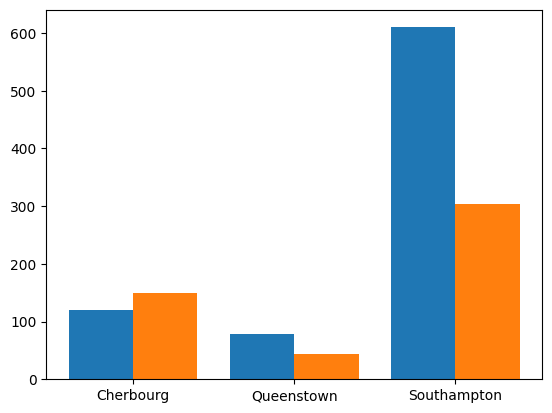

In [50]:
plt.bar(
  x = [1, 2, 3],
  height = stack_table.loc[:, "Died"],
  width = 0.4,
  label = "Died")
plt.bar(
  x = [1.4, 2.4, 3.4],
  height = stack_table.loc[:, "Survived"],
  width = 0.4,
  label = "Survived")
plt.xticks([1.2, 2.2, 3.2], sub_titanic_data.embarkedC.cat.categories)

Now we'll fancy it up with some labels and titles.

Text(0.5, 1.0, 'Most Embarked in the Southampton Port \n A higher proportion survived from Cherbourg')

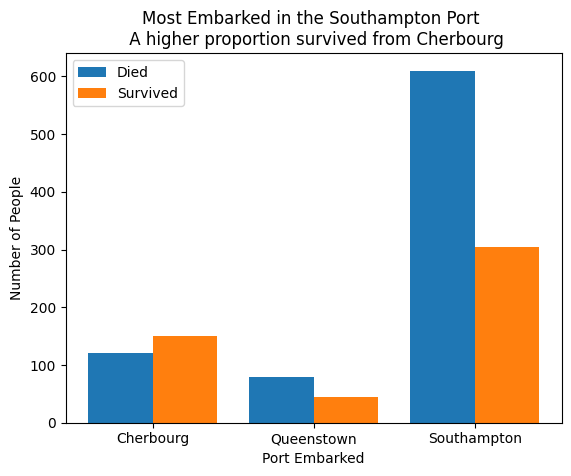

In [52]:
plt.bar(
  x = [1, 2, 3],
  height = stack_table.loc[:, "Died"],
  width = 0.4,
  label = "Died")
plt.bar(
  x = [1.4, 2.4, 3.4],
  height = stack_table.loc[:, "Survived"],
  width = 0.4,
  label = "Survived")
plt.xticks([1.2, 2.2, 3.2], sub_titanic_data.embarkedC.cat.categories)
plt.xlabel("Port Embarked")
plt.ylabel("Number of People")
plt.legend(loc = 0)
plt.title("Most Embarked in the Southampton Port \n A higher proportion survived from Cherbourg")

---

### Plotting Numeric Variables    

Whoa - that was way too much work to create side-by-side bar plots... We could go through similar processes to create histograms, scatterplots, etc...

Functions like `plt.scatter()` aren't bad to work with:

Text(0, 0.5, 'Fare')

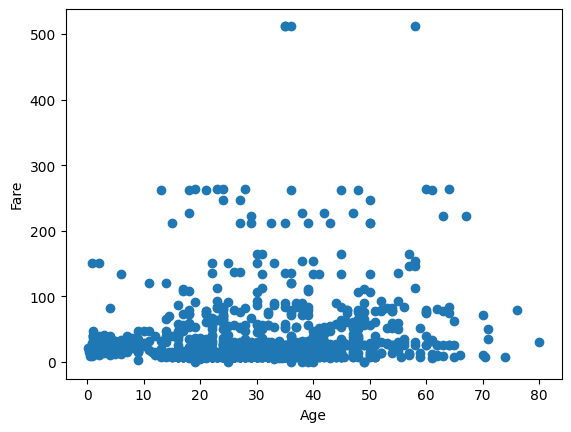

In [54]:
plt.scatter(sub_titanic_data.age, sub_titanic_data.fare)
plt.xlabel("Age")
plt.ylabel("Fare")

But customizing the plots is a good bit of work.  `pandas` has functionality to do plotting on data frames that will save us time!

However, it is really useful to know the basics of `matplotlib` as many of the plotting systems are built on it!

---

## Quick Video

This video shows an example of using `matplotlib` plotting (Coming soon!)


---

## Recap

- Must understand the type of data you have to visualize it
- Goal: Describe the distribution

- `matplotlib` can create custom plots

    + Lots of work to specify everything yourself
    
- Many other plotting paradigms to consider!
    + `pandas` and `seaborn` next
